Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64


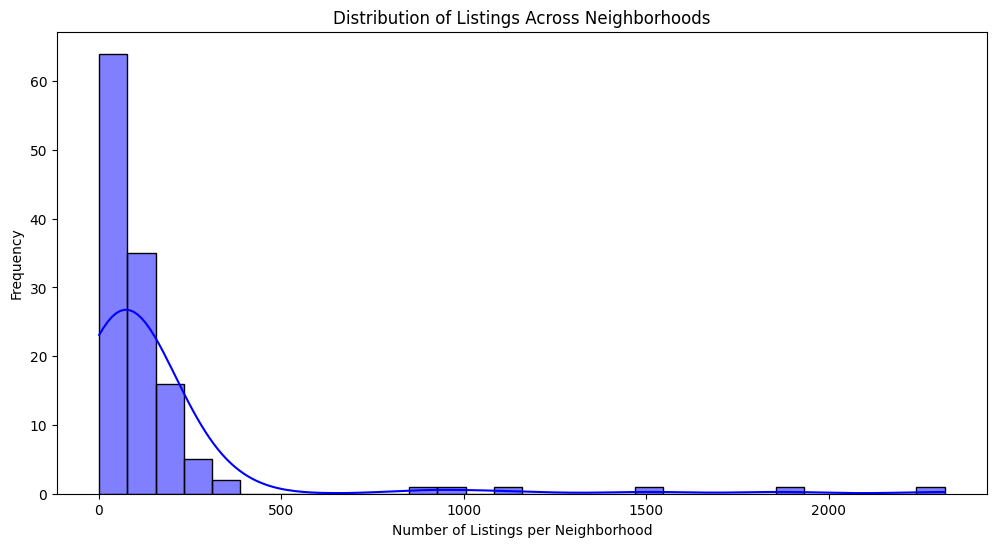

<ipython-input-3-8d9f53d20037>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')


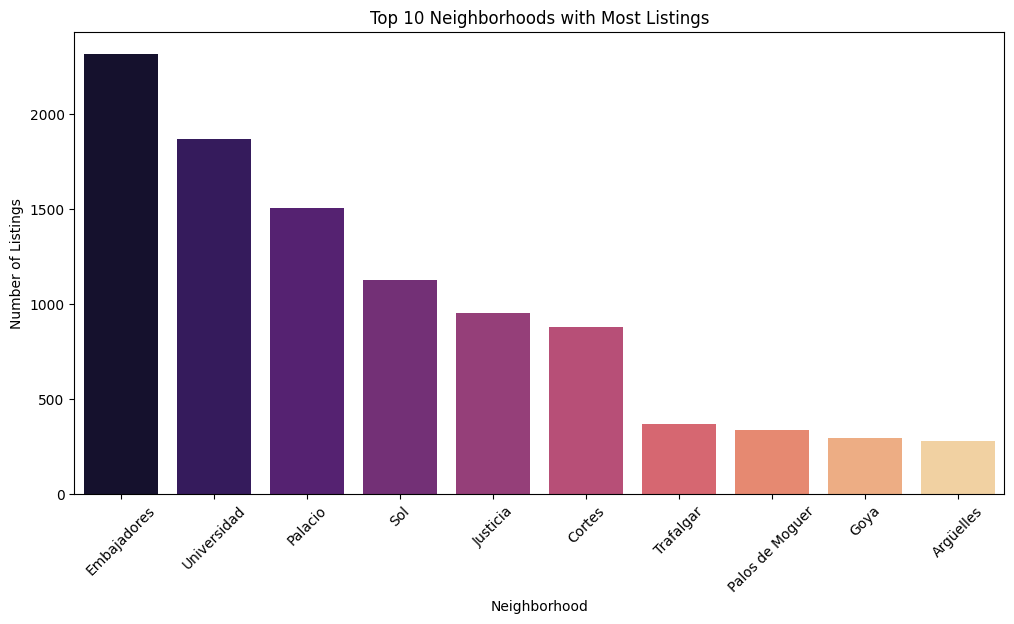


Single Listing Hosts: 6606 (39.12%)
Multiple Listing Hosts: 10282 (60.88%)


<ipython-input-3-8d9f53d20037>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')


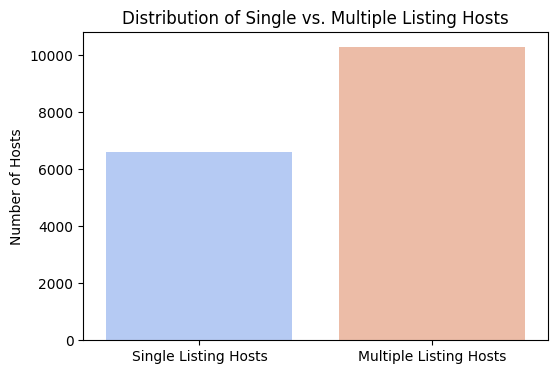


Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-3-8d9f53d20037>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


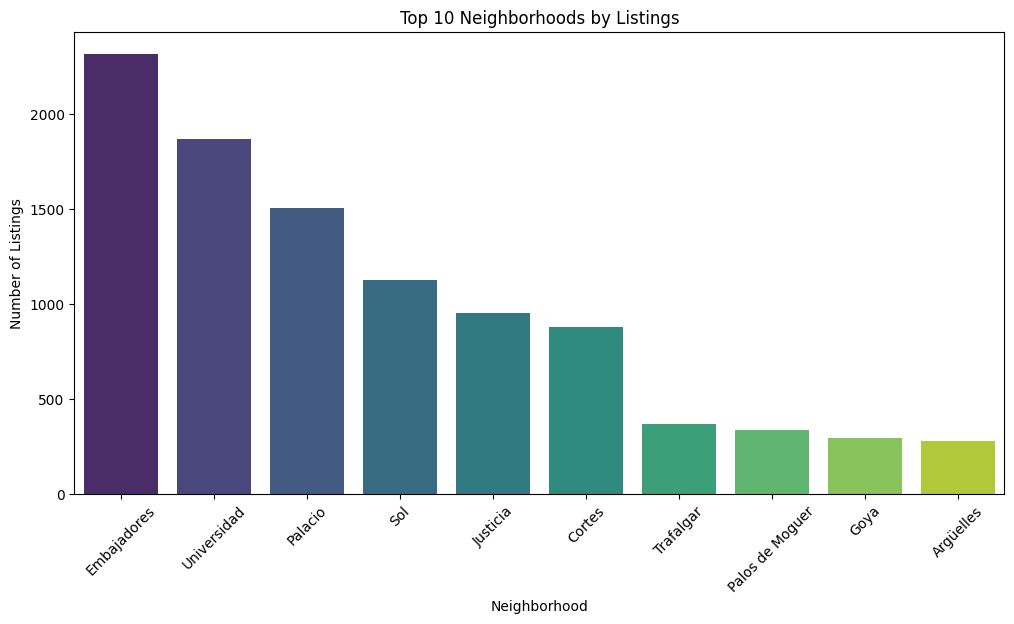

<ipython-input-3-8d9f53d20037>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


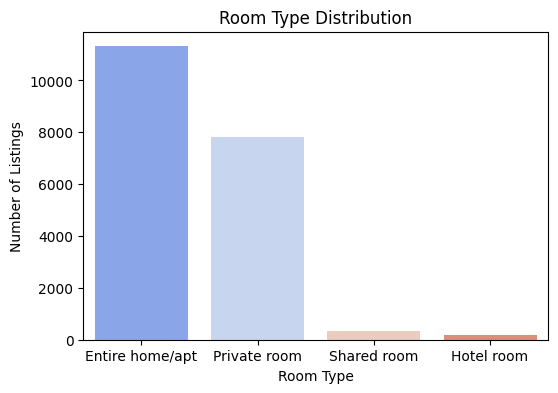

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Visualization of neighborhood distribution
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

# Identifying hot areas (top 10 neighborhoods with most listings)
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.head(10).index, y=neighborhood_counts.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods with Most Listings")
plt.show()

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
total_hosts = single_listing_hosts + multi_listing_hosts

single_percentage = (single_listing_hosts / total_hosts) * 100
multi_percentage = (multi_listing_hosts / total_hosts) * 100

print("\nSingle Listing Hosts:", single_listing_hosts, f"({single_percentage:.2f}%)")
print("Multiple Listing Hosts:", multi_listing_hosts, f"({multi_percentage:.2f}%)")

# Visualization of host distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Listing Hosts', 'Multiple Listing Hosts'], y=[single_listing_hosts, multi_listing_hosts], palette='coolwarm')
plt.ylabel("Number of Hosts")
plt.title("Distribution of Single vs. Multiple Listing Hosts")
plt.show()

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()

SyntaxError: unmatched ')' (<ipython-input-5-5e9c74955a61>, line 102)

<ipython-input-6-a984c3f49c36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')


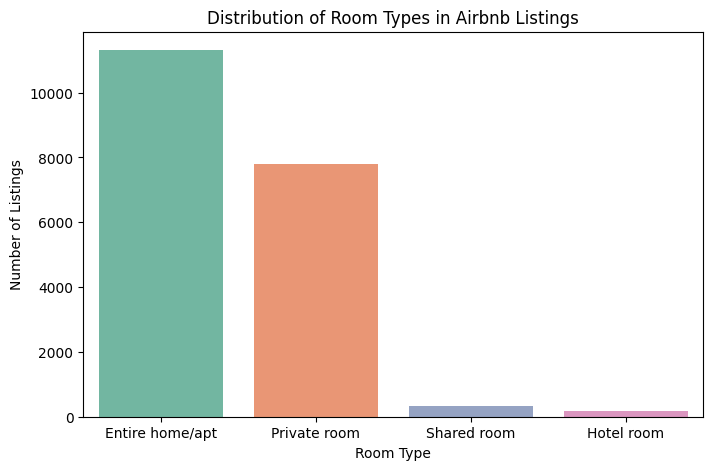

In [6]:
# Room Type Distribution
room_type_counts = df['room_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Distribution of Room Types in Airbnb Listings")
plt.show()

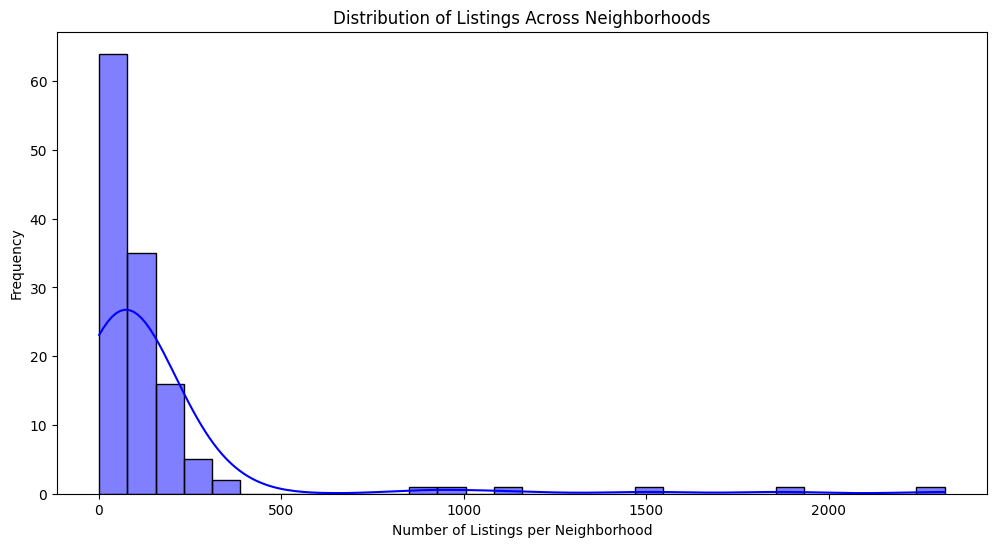

In [7]:
# Neighborhood Distribution
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True, color='blue')
plt.xlabel("Number of Listings per Neighborhood")
plt.ylabel("Frequency")
plt.title("Distribution of Listings Across Neighborhoods")
plt.show()

<ipython-input-8-be017e457dbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_listing_counts.index, y=host_listing_counts.values, palette='coolwarm')


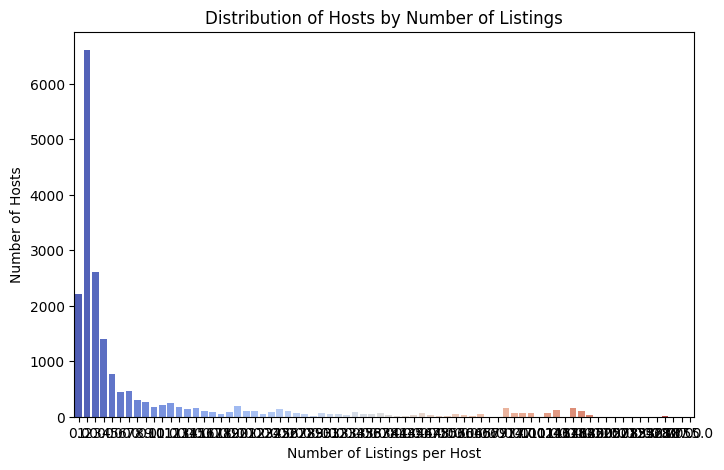

In [8]:
# Host Listing Counts
host_listing_counts = df['host_total_listings_count'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=host_listing_counts.index, y=host_listing_counts.values, palette='coolwarm')
plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts")
plt.title("Distribution of Hosts by Number of Listings")
plt.show()

<ipython-input-9-580b8a912c4c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_english', y='price', data=df, palette='Set1')


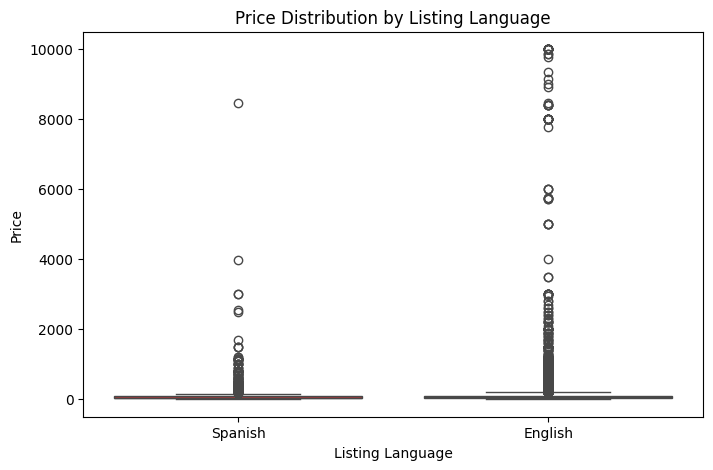

In [9]:
# Detect English and Spanish Listings
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)
english_prices = df[df['is_english']]['price']
spanish_prices = df[~df['is_english']]['price']

# Plotting
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_english', y='price', data=df, palette='Set1')
plt.xticks([0, 1], ['Spanish', 'English'])
plt.xlabel("Listing Language")
plt.ylabel("Price")
plt.title("Price Distribution by Listing Language")
plt.show()